# PCA - cancer data

### Import

In [154]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression

### Load Data

In [155]:
data = pd.read_csv('../../data/breast_cancer/wdbc.data',header=None)
columns = pd.read_csv('../../data/breast_cancer/wdbc.columns',header=None).values[:,0]
data.columns = columns
X = data[columns[2:12]].values
columns = columns[2:12]
columns = [column.replace('_',' ') for column in columns]

### Visualize the data

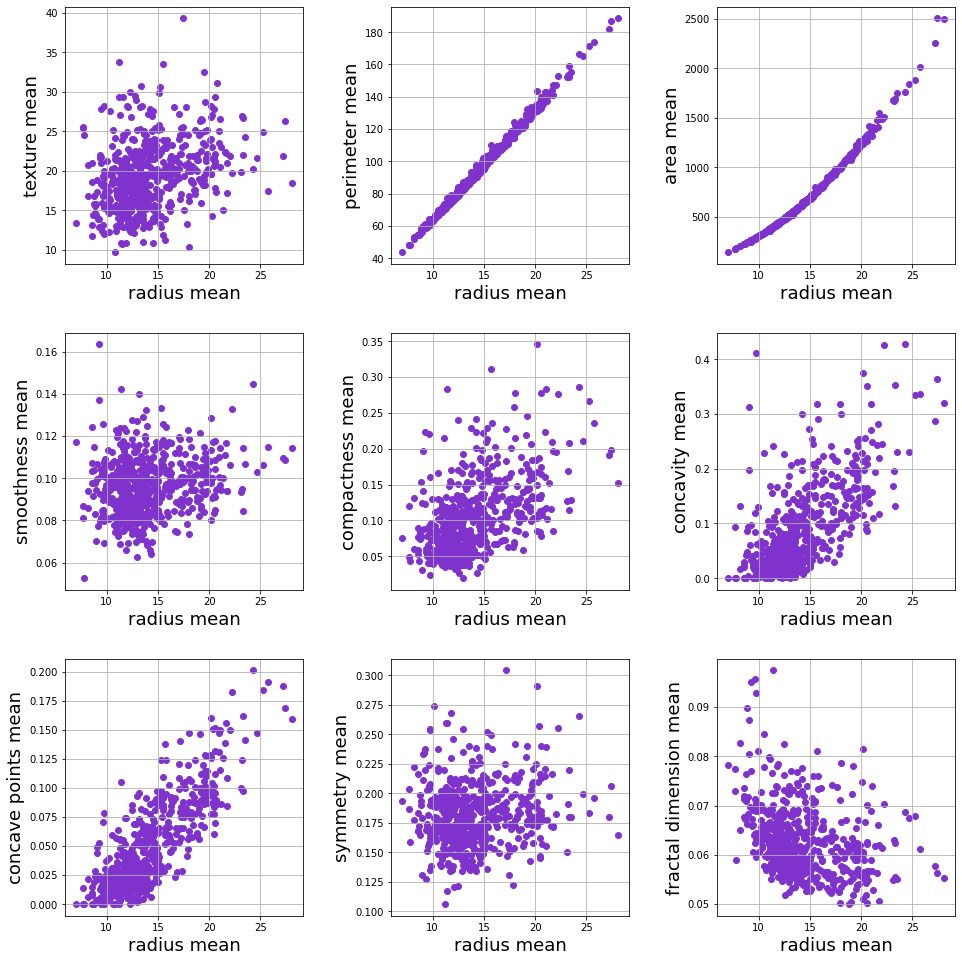

In [156]:
plt.figure(figsize=(14,14))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.scatter(X[:,0],X[:,i+1],color=(0.5,0.2,0.8))
    plt.xlabel(columns[0],fontsize=18)
    plt.ylabel(columns[i+1],fontsize=18)
    plt.grid()
    plt.tight_layout(pad=3.0)

### Define our PCA object

In [157]:
pca = PCA(n_components=X.shape[1]);

### Fit

In [158]:
C = pca.fit_transform(X);

### Plot Explained Variance

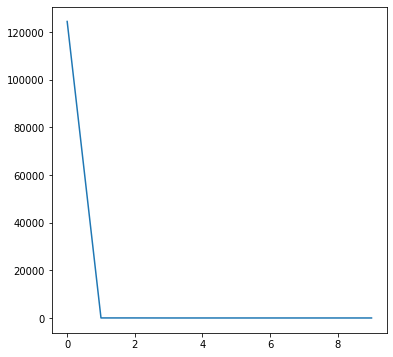

In [159]:
plt.figure(figsize=(6,6))
plt.plot(pca.explained_variance_);

In [ ]:
###

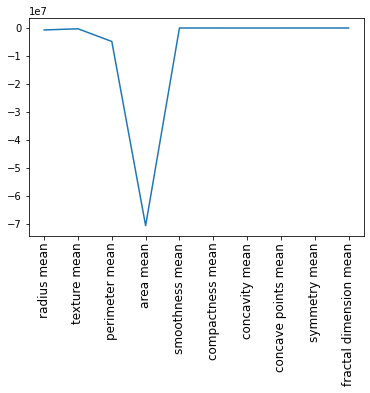

In [177]:
centered_matrix = X.T - X.T.mean(axis=1)[:, np.newaxis]
cov = np.dot(centered_matrix, centered_matrix.T)
eigvals, eigvecs = np.linalg.eig(cov);
plt.plot(eigvecs[:,0]*eigvals[0]);
plt.xticks(range(10),columns,rotation=90,fontsize=12);

### Remove Redunant Information

In [149]:
indices_to_keep = np.array([0,1,4,5,6,7,8,9])
columns = np.array(columns)[indices_to_keep]
X = X[:,indices_to_keep]

### Rerun PCA

In [150]:
pca = PCA(n_components=X.shape[1]);
C = pca.fit_transform(X);

### Replot Variance

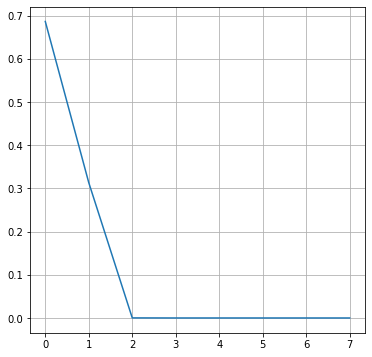

In [151]:
plt.figure(figsize=(6,6))
plt.plot(pca.explained_variance_ratio_);
plt.grid()

[1.20610371e+04 5.50298287e+03 3.33709938e+00 2.96698017e-01
 1.85188805e-01 7.30677473e-02 2.64467920e-02 5.05762576e-03]


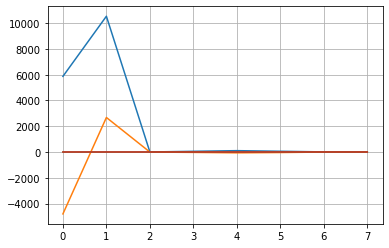

In [153]:
centered_matrix = X.T - X.T.mean(axis=1)[:, np.newaxis]
cov = np.dot(centered_matrix, centered_matrix.T)
eigvals, eigvecs = np.linalg.eig(cov)
print(eigvals)
plt.plot(eigvecs[:,0]*eigvals[0]);
plt.plot(eigvecs[:,1]*eigvals[1]);
plt.plot(eigvecs[:,2]*eigvals[2]);
plt.plot(eigvecs[:,3]*eigvals[3]);
plt.grid()